# Part 1 - Exploratory Data Analysis

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from matplotlib.pyplot import figure
%matplotlib inline
sns.set(color_codes=True)

### Read in the data
#### Cursory Review of data as a whole

In [2]:
data = pd.read_csv("mrm5_model_data.csv")

In [3]:
print(data.info)

<bound method DataFrame.info of          account_id  status  cos  rim_age  loan  s_plus_c  fico_b  ck_returns  \
0      FjWHEBLtghQ7  Closed    1        4     0         0     761         NaN   
1      NY9sb3zWSC7L  Closed    1       41     0         1     766         NaN   
2      CsgsApaKRyUc  Closed    1       42     0         1     636         NaN   
3      xtDoVry22KCc  Closed    1       42     0         1     507         NaN   
4      AY1ULa7dimU5  Closed    1       41     0         1     471         NaN   
...             ...     ...  ...      ...   ...       ...     ...         ...   
56671  klCLOY2EycCd  Active    0        0     0         1       0         NaN   
56672  Gj3ta4BAqFC6  Active    0        0     1         0       0         NaN   
56673  TyrkQdxcDaJU  Active    0        0     0         0       0         NaN   
56674  u5SzVvhz1S3U  Active    0        0     0         1       0         NaN   
56675  HbCPuxsnV1de  Active    0        0     0         1       0         NaN

In [4]:
data.describe()

,cos,rim_age,loan,s_plus_c,fico_b,ck_returns,max_days_neg,num_times_neg,ntriggers,avg_bal6,avg_bal3
count,56676.000000,56676.000000,56676.000000,56676.000000,56676.000000,835.000000,56676.000000,56676.000000,56676.000000,5.122600e+04,5.039600e+04
mean,0.009104,21.966088,0.288941,0.666526,519.410932,1.450299,1.530454,0.772285,0.431947,1.474701e+04,1.606729e+04
std,0.094982,12.395577,0.453274,0.471459,330.750199,1.142533,8.795420,4.069600,1.502197,5.145974e+04,5.677016e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-4.674000e+03,-6.230000e+03
25%,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.300000e+01,4.900000e+01
50%,0.000000,22.000000,0.000000,1.000000,694.000000,1.000000,0.000000,0.000000,0.000000,1.036000e+03,1.107000e+03
75%,0.000000,33.000000,1.000000,1.000000,771.000000,1.000000,0.000000,0.000000,0.000000,8.356500e+03,9.405000e+03
max,1.000000,42.000000,1.000000,1.000000,844.000000,11.000000,376.000000,132.000000,21.000000,1.708350e+06,1.748436e+06


In [5]:
# What are the fields in the data
data.columns.tolist()

['account_id',
 'status',
 'cos',
 'rim_age',
 'loan',
 's_plus_c',
 'fico_b',
 'ck_returns',
 'max_days_neg',
 'num_times_neg',
 'ntriggers',
 'avg_bal6',
 'avg_bal3']

In [6]:
data.head()

,account_id,status,cos,rim_age,loan,s_plus_c,fico_b,ck_returns,max_days_neg,num_times_neg,ntriggers,avg_bal6,avg_bal3
0,FjWHEBLtghQ7,Closed,1,4,0,0,761,NaN,0,0,0,NaN,NaN
1,NY9sb3zWSC7L,Closed,1,41,0,1,766,NaN,0,0,0,NaN,NaN
2,CsgsApaKRyUc,Closed,1,42,0,1,636,NaN,1,1,2,NaN,NaN
3,xtDoVry22KCc,Closed,1,42,0,1,507,NaN,74,12,7,NaN,NaN
4,AY1ULa7dimU5,Closed,1,41,0,1,471,NaN,1,3,2,NaN,NaN


In [7]:
data.tail()

,account_id,status,cos,rim_age,loan,s_plus_c,fico_b,ck_returns,max_days_neg,num_times_neg,ntriggers,avg_bal6,avg_bal3
56671,klCLOY2EycCd,Active,0,0,0,1,0,NaN,0,0,0,NaN,NaN
56672,Gj3ta4BAqFC6,Active,0,0,1,0,0,NaN,0,0,0,NaN,NaN
56673,TyrkQdxcDaJU,Active,0,0,0,0,0,NaN,0,0,0,NaN,NaN
56674,u5SzVvhz1S3U,Active,0,0,0,1,0,NaN,0,0,0,NaN,NaN
56675,HbCPuxsnV1de,Active,0,0,0,1,0,NaN,0,0,0,NaN,NaN


***
***
## Section A3 Looking at the Variables Individually - Exploratory Data Analysis

## Categorical Variables:
+ cos
+ account_id
+ status
+ loan
+ s_plus_c
+ ntriggers
+ num_times_neg
***

In [8]:
# Helper Functions
import matplotlib.pyplot as plt

def plot_catVar(var_name):
    valueCounts = data[var_name].value_counts()
    ind = list(valueCounts.index)
    val = list(valueCounts.values)
    fig = plt.figure(figsize=(30, 10))
    plt.bar(ind, val, color='blue', width=0.4)
    plt.ylabel("Counts")
    plt.xlabel(var_name.upper())
    plt.title("Counts of {} values".format(var_name.upper()))
    plt.show()
    

def check_catVar(var_name):
    unique_values = data[var_name].unique()
    valueCounts = data[var_name].value_counts()
    print("*** For the field {} ***".format(var_name))
    print("\nUnique values:\n", unique_values)
    print("\nThe value counts are:")
    print(valueCounts)
    print("\nCount of NULL {} values:".format(var_name), data[var_name].isnull().sum())
    print("Count of NA {} values:".format(var_name), data[var_name].isna().sum())
    print("Plot out Values")
    plot_catVar(var_name)

def check_contVar(var_name):
    print("\nCount of NULL {} values:".format(var_name), data[var_name].isnull().sum())
    print("Count of NA {} values:".format(var_name), data[var_name].isna().sum())
    print("Max value of {}:".format(var_name), data[var_name].max())
    print("Min value of {}:".format(var_name), data[var_name].min())
    print("Type of value", type(data[var_name].values))
    print("Random sample of values:\n", data[var_name].sample(n=10))


***
***
## <span style="color:red">TARGET: COS </span>
### Account Charge-Off Indicator
### Dependent or Target Variable
***

In [ ]:
check_catVar('cos')
print("Portion of data with positive targets: ", cnts[1]/(cnts[0]+cnts[1]))

***
***
## <span style="color:red">INDEX: ACCOUNT_ID </span>
***

In [ ]:
# Independent Field: account_id
# is account_id unique and complete?
dups = data['account_id'].duplicated()
print("Number of duplicate account_id: ", dups.sum())
# Finding NULL values
print("Number of missing account_id:", data["account_id"].isnull().sum())

* **
***
## <span style="color:red">1: STATUS </span>
### Last status of account.
***

In [ ]:
check_catVar('status')

In [ ]:
# How does 'status' correlates with 'cos'?

In [ ]:
pd.crosstab(data['cos'],data['status'])


Discussion on STATUS field:
All cos positive accounts are closed. Not all closed account are positive 'cos'.
516/7235 = 0.071, or %7.1 are closed and cos positive.

* **
***
## <span style="color:red">2: LOAN</span>
### Does account have any loan product associated with it?
***

*** For the field loan ***

Unique values:
 [0 1]

The value counts are:
0    40300
1    16376
Name: loan, dtype: int64

Count of NULL loan values: 0
Count of NA loan values: 0
Plot out Values


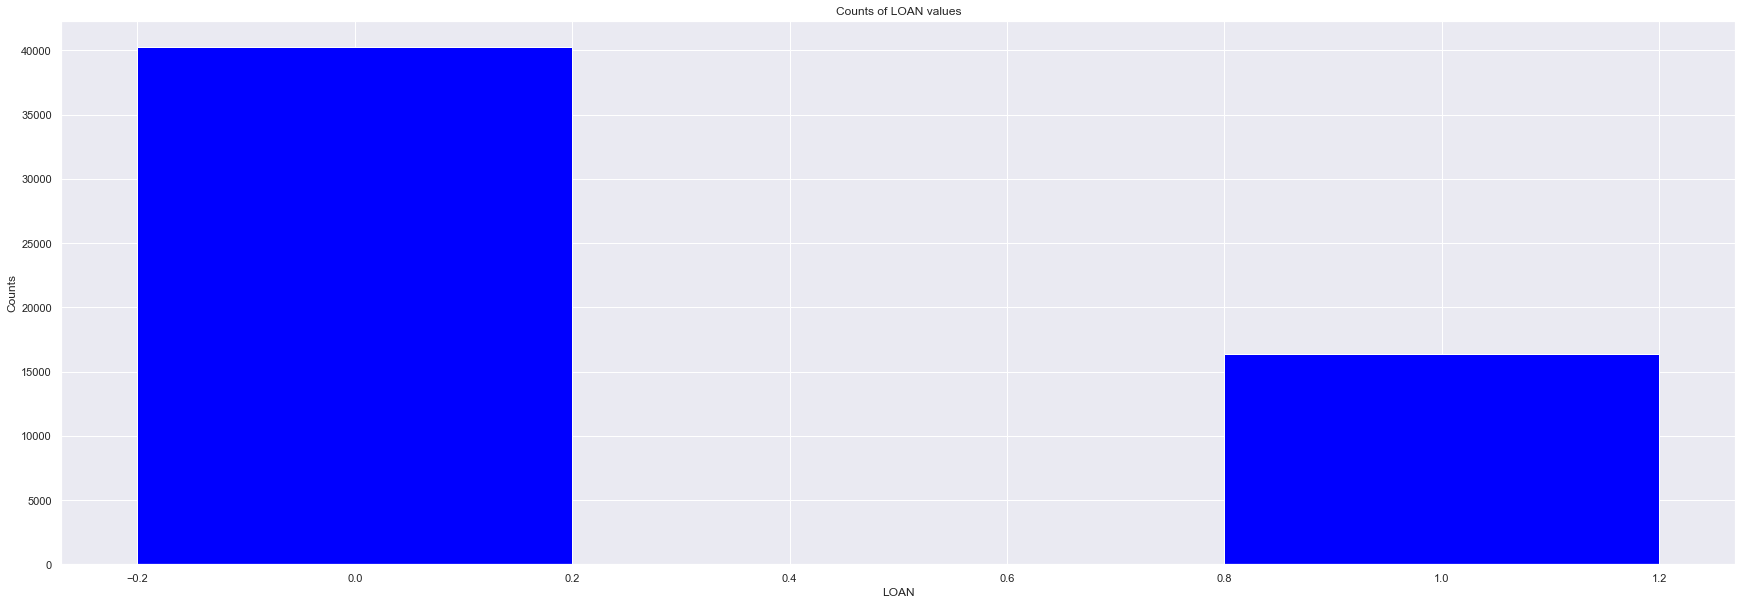

In [10]:
check_catVar('loan')

In [11]:
ct_cos_loan = pd.crosstab(data['cos'],data['loan'])
print(ct_cos_loan)

loan      0      1
cos               
0     39802  16358
1       498     18


***
### Calculations done on excel spreadsheet (not shown here)
#### P(cos yes | loan=1)	    0.00110
#### P(cos yes | loan=0)	    0.01236 (no loan associated with account)
We see here that an account that does not have a loan, has a much larger chance of resulting into a charge off account.


* **
***
## <span style="color:red">3: S_PLUS_C</span>
### Is account just savings, or savings and checking?
***

In [ ]:
check_catVar('s_plus_c')

In [ ]:
# Cross Tab with target field.
pd.crosstab(data['cos'],data['s_plus_c'])

***
### Calculations outside of this notebook (not shown here)
#### Prob(cos yes  |  s_plus_c = 1)	=  0.011356717
#### Prob(cos yes  |  s_plus_c = 0)	=  0.004603175
If an account has a checking account, it is much more likely to result in charge off than saving alone.

* **
***
## <span style="color:red">4: NTRIGGERS</span>
### Number of alerts from other financial institutions.
***

In [ ]:
check_catVar('ntriggers')

In [ ]:
# Cross Tab with Target Varaible
ct_cos_ntriggers = pd.crosstab(data['cos'],data['ntriggers'])
print(ct_cos_ntriggers)

In [ ]:
ct_cos_ntriggers.plot.bar(figsize=(30, 10))

***
Transform data by binning it into ntriggers<2 (bin 0) and ntriggers >= 2 (bin 1). This allows a better fitting model. This binning will prevent overfitting.

* **
***
## <span style="color:red">5: NUM_TIMES_NEG</span>
### Number of time the account went negative.
***

*** For the field num_times_neg ***

Unique values:
 [  0   1  12   3   6  25   2   5   7   8  30  58   9  31   4  14  43  11
  39  10  27  15  19  17  41  36  24  18  34  22  37  28  13  29  42  59
  16  56  35  21  67  60  48  33  38  26  20  47  94  65  32  74  23  69
  53  49  51  45  62  44  68  64 132  77  92  82  40  50 107  61  57  79
  81  75  83  63  66  78  80  46  54  52  55]

The value counts are:
0     50376
1      1933
2       952
3       595
4       398
      ...  
80        1
94        1
54        1
52        1
55        1
Name: num_times_neg, Length: 83, dtype: int64

Count of NULL num_times_neg values: 0
Count of NA num_times_neg values: 0
Plot out Values


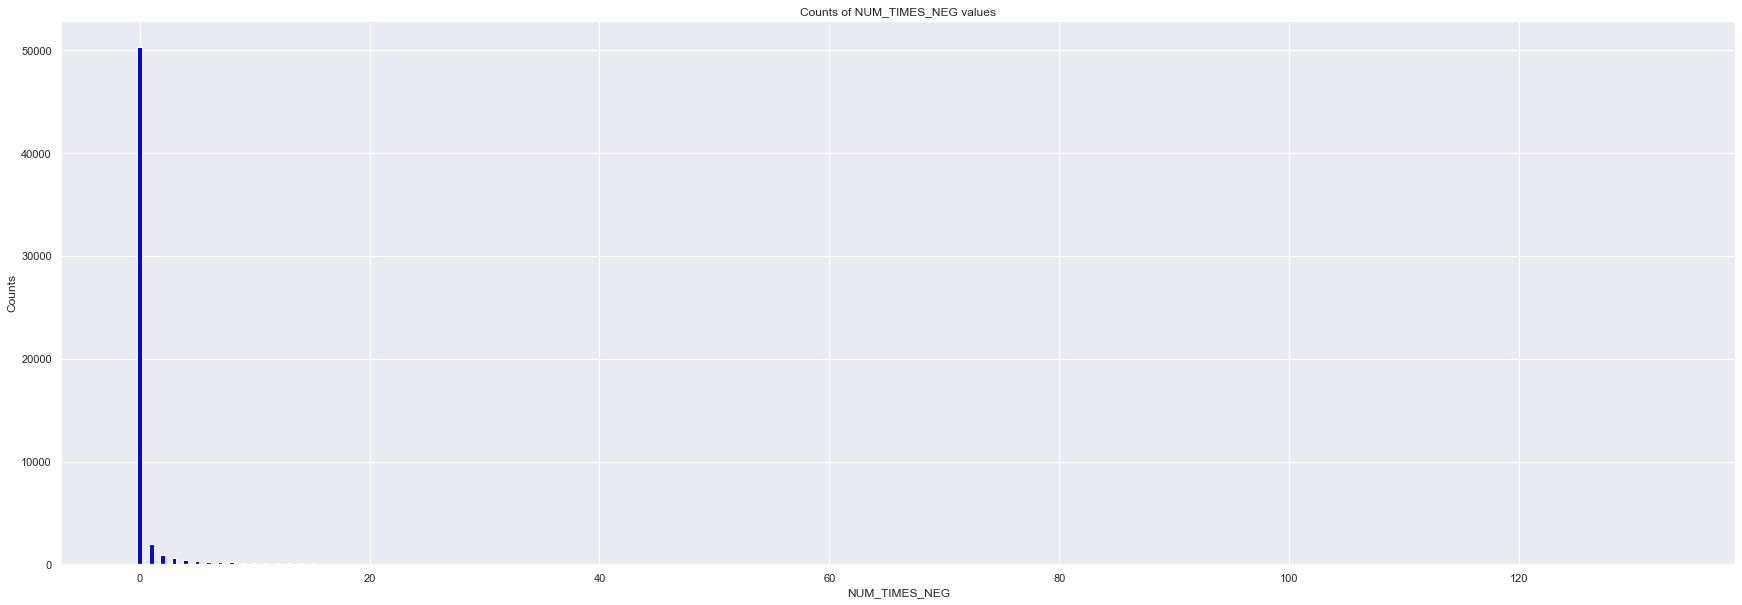

In [47]:
check_catVar('num_times_neg')

In [48]:
# Cross Tab with Target Variable
ct_cos_numtimeneg = pd.crosstab(data['cos'],data['num_times_neg'])
print(ct_cos_numtimeneg)

num_times_neg    0     1    2    3    4    5    6    7    8    9    ...  78   \
cos                                                                 ...        
0              50283  1842  877  550  374  276  227  192  171  153  ...    1   
1                 93    91   75   45   24   16   21   15   14   15  ...    0   

num_times_neg  79   80   81   82   83   92   94   107  132  
cos                                                         
0                1    1    1    2    2    1    1    1    1  
1                0    0    0    0    0    0    0    0    0  

[2 rows x 83 columns]


In [62]:
# Bin values to make them statistically significant.
data['num_times_neg_bin'] = pd.cut(data['num_times_neg'], bins=(0, 2, 25, 26, 49, 300),
                                  labels=['bin1', 'bin2', 'bin3', 'bin4', 'bin5'], right=False, include_lowest=True,
                                  ordered=False)

In [63]:

print("Normalize by bin, or portion of charge-offs.".upper())
ct_cos_num_times_neg_bin1 = pd.crosstab(data['cos'], data['num_times_neg_bin']).apply(lambda r:r/r.sum(), axis=0)
print(ct_cos_num_times_neg_bin1)

print("\nNormalize by row, or portion of members.".upper())
ct_cos_num_times_neg_bin2 = pd.crosstab(data['cos'], data['num_times_neg_bin']).apply(lambda r:r/r.sum(), axis=1)
print(ct_cos_num_times_neg_bin2)

print("\nDirect Counts.".upper())
ct_cos_num_times_neg_bin = pd.crosstab(data['cos'], data['num_times_neg_bin'])
print(ct_cos_num_times_neg_bin)



NORMALIZE BY BIN, OR PORTION OF CHARGE-OFFS.
num_times_neg_bin      bin1      bin2   bin3      bin4      bin5
cos                                                             
0                  0.996482  0.925898  0.875  0.898955  0.933333
1                  0.003518  0.074102  0.125  0.101045  0.066667

NORMALIZE BY ROW, OR PORTION OF MEMBERS.
num_times_neg_bin      bin1      bin2      bin3      bin4      bin5
cos                                                                
0                  0.928152  0.065634  0.000374  0.004594  0.001246
1                  0.356589  0.571705  0.005814  0.056202  0.009690

DIRECT COUNTS.
num_times_neg_bin   bin1  bin2  bin3  bin4  bin5
cos                                             
0                  52125  3686    21   258    70
1                    184   295     3    29     5


* **
***
## <span style="color:red">6: MAX_DAYS_NEG</span>
### Maximum consecutive days account was negative.
***

In [ ]:
check_catVar('max_days_neg')

In [40]:
# Using Excel, inspect how max_days_neg field correlates with charged-off accounts.
# Modeling tactic: bin the values of max_days_neg to create statistical significance.
data['max_days_neg_bin'] = pd.cut(data['max_days_neg'], bins=(0,1,15,40,110,300), labels=['bin1', 'bin2', 'bin3', 'bin4', 'bin5'], right=False, include_lowest=True, ordered=False)

In [45]:
ct_cos_max_days_neg_bin = pd.crosstab(data['cos'], data['max_days_neg_bin'])
print(ct_cos_max_days_neg_bin)

max_days_neg_bin   bin1  bin2  bin3  bin4  bin5
cos                                            
0                 50283  4541   847   417    72
1                    93   230   108    70    14


In [64]:
print("Normalize by bin, or portion of charge-offs.".upper())
ct_cos_max_days_neg_bin1 = pd.crosstab(data['cos'], data['max_days_neg_bin']).apply(lambda r:r/r.sum(), axis=0)
print(ct_cos_num_times_neg_bin1)

print("\nNormalize by row, or portion of members.".upper())
ct_cos_max_days_neg_bin2 = pd.crosstab(data['cos'], data['max_days_neg_bin']).apply(lambda r:r/r.sum(), axis=1)
print(ct_cos_num_times_neg_bin2)

print("\nDirect Counts.".upper())
ct_cos_max_days_neg_bin = pd.crosstab(data['cos'], data['max_days_neg_bin'])
print(ct_cos_num_times_neg_bin)


NORMALIZE BY BIN, OR PORTION OF CHARGE-OFFS.
num_times_neg_bin      bin1      bin2   bin3      bin4      bin5
cos                                                             
0                  0.996482  0.925898  0.875  0.898955  0.933333
1                  0.003518  0.074102  0.125  0.101045  0.066667

NORMALIZE BY ROW, OR PORTION OF MEMBERS.
num_times_neg_bin      bin1      bin2      bin3      bin4      bin5
cos                                                                
0                  0.928152  0.065634  0.000374  0.004594  0.001246
1                  0.356589  0.571705  0.005814  0.056202  0.009690

DIRECT COUNTS.
num_times_neg_bin   bin1  bin2  bin3  bin4  bin5
cos                                             
0                  52125  3686    21   258    70
1                    184   295     3    29     5


Note on the transformation:
The nature of max_day_neg field requires that it be binned when used as a feature to any model.
bin1: 0-1
bin2: 2-14
bin3: 15-39
bin4: 40-109
bin5: 110 and above


* **
***
## <span style="color:red">7: RIM_AGE</span>
### Age of the accout owner's membership in months
***

In [ ]:
check_contVar('rim_age')

In [ ]:
plt.hist(data['rim_age'], bins=42)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

In [ ]:
# what is the distribution of rim_age among those that have COS?
data_cosPOS = data[data['cos'].values == 1].copy(deep=True)
plt.hist(data_cosPOS['rim_age'], bins=42)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

* **
***
## <span style="color:red">8: CK_RETURNS</span>
### Number of returned checks since Jan. 2017
***

In [ ]:
check_contVar('ck_returns')

In [ ]:
plt.hist(data['ck_returns'], bins=42)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

* **
***
## <span style="color:red">9: FICO_B</span>
### FICO credit score
***

In [ ]:
check_contVar("fico_b")

In [ ]:
plt.hist(data['fico_b'], bins=100)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

In [ ]:
# what is the distribution of rim_age among those that have COS?
data_cosPOS = data[data['cos'].values == 1].copy(deep=True)
plt.hist(data_cosPOS['fico_b'], bins=100)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

In [ ]:
# How many fico scores are 0?
COSall_FICO_Zero = data[data['fico_b'] == 0]
print("Count of FICO scores = 0: ", COSall_FICO_Zero.shape[0])
COSpos_FICO_Zero = data[(data['fico_b'] == 0) & (data['cos'] == 1)]
print("Count of FICO scores = 0 AND COS positive: ", COSpos_FICO_Zero.shape[0])

* **
***
## <span style="color:red">10: AVG_BAL6</span>
### Rolling 6-month deposit amount
***

In [ ]:
check_contVar('avg_bal6')

In [ ]:
plt.hist(data['avg_bal6'], bins=300)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

* **
***
## <span style="color:red">11: AVG_BAL3</span>
### Rolling 3-month deposit amount
***

In [ ]:
check_contVar('avg_bal3')

In [ ]:
plt.hist(data['avg_bal3'], bins=300)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()